In [1]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scanpy as sc
import scanpy.external as sce
import matplotlib 
from matplotlib import rcParams
import matplotlib.font_manager
import matplotlib.font_manager as fm
import anndata
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import math
from scipy import ndimage
from scipy.spatial import distance_matrix
from matplotlib_venn import venn3, venn3_circles, venn2
import requests
sc.settings.verbosity = 3

In [2]:
adata=sc.read('feature_enzyme.h5ad')
adata

AnnData object with n_obs × n_vars = 408218 × 588
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'renal_region', 'patient_id', 'sample_id', 'leiden', 'leiden1', 'leiden2', 'leiden3', 'leiden_use', 'leiden4', 'sample_id_new', 'patient_id_new', 'renal_region_new', 'glom_list'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'mz_raw', 'new_index', 'mol_formula', 'adduct', 'moleculeNames', 'moleculeIds', 'genes', 'common_name', 'class_name', 'subclass_name', 'class_name_short', 'subclass_name_short', 'genes_all'
    uns: 'dendrogram_leiden_use', 'dendrogram_patient_id_new', 'dendrogram_renal_region', 'dendrogram_renal_region_new', 'dendrogram_sample_id_new', 'glom_list_colors', 'leiden', 'leiden1_colors', 'leiden2_colors', 'leiden3_colors', 'leiden4_colors', 'leiden_colors', 'leiden_use_colors', 'neighbors', 'patient_id_colors', 'patient_id_new_colors', 'pca', 'rank_genes_groups_glom', 'rank_genes_groups_leiden_use',

In [12]:
new_list=list(range(len(adata.var)))

In [14]:
carnitine_list=['C23H42NO5', 'C27H54NO4', 'C23H41NO4Na',
 'C29H46NO4',
 'C29H47NO4Na',
 'C23H46NO4',
 'C25H48NO4',
 'C25H46NO4',
 'C23H44NO4',
 'C21H42NO4',
 'C25H50NO4',
 'C23H46NO5',
 'C25H48NO5',
 'C21H40NO4',
 'C25H50NO5',
 'C23H44NO5',
 'C21H42NO5',
 'C25H44NO4',
 'C25H47NO4Na',
 'C23H45NO4Na',
 'C19H38NO4',
 'C23H42NO4',
 'C21H38NO4'
]
carnitine_list_new=[]
for i in carnitine_list:
    index=list(adata.var.mol_formula).index(i)
    print(index,adata.var.common_name[index])
    new_list[index]=adata.var.common_name[index]
    carnitine_list_new.append(adata.var.index[index])

64 3-Hydroxyhexadecadienoylcarnitine
575 Arachidyl carnitine
266 9,12-Hexadecadienoylcarnitine
199 Cervonyl carnitine
367 Docosa-4,7,10,13,16-pentaenoyl carnitine,Clupanodonyl carnitine
336 Palmitoylcarnitine
337 Oleoylcarnitine,Octadecenoylcarnitine,Elaidic carnitine,2-Hydroxyhexadecanoylcarnitine
341 Linoelaidylcarnitine,Linoleyl carnitine
342 trans-Hexadec-2-enoyl carnitine,9-Hexadecenoylcarnitine
344 Tetradecanoylcarnitine
349 Stearoylcarnitine
350 3-hydroxyhexadecanoyl carnitine,3-Hydroxyhexadecanoylcarnitine
358 3-Hydroxy-11Z-octadecenoylcarnitine,3-Hydroxy-9Z-octadecenoylcarnitine,Dodecanedioylcarnitine,trans-2-Dodecenoylcarnitine,2-Octenoylcarnitine
375 trans-2-Tetradecenoylcarnitine,cis-5-Tetradecenoylcarnitine
392 12-Hydroxy-12-octadecanoylcarnitine
398 3-Hydroxy-9-hexadecenoylcarnitine
401 2-Hydroxymyristoylcarnitine,3-Hydroxytetradecanoyl carnitine
419 Gamma-linolenyl carnitine
441 Oleoylcarnitine,Octadecenoylcarnitine,Elaidic carnitine,2-Hydroxyhexadecanoylcarnitine
446 Pa

In [26]:
new_list[266]='9,12-Hexadecadienoylcarnitine(Na+)'
new_list[367]='Docosa-4,7,10,13,16-pentaenoyl carnitine'
new_list[337]='Oleoylcarnitine'
new_list[341]='Linoelaidylcarnitine'
new_list[342]='trans-Hexadec-2-enoyl carnitine'
new_list[350]='3-hydroxyhexadecanoyl carnitine'
new_list[358]='3-Hydroxy-11Z-octadecenoylcarnitine'
new_list[375]='trans-2-Tetradecenoylcarnitine'
new_list[401]='2-Hydroxymyristoylcarnitine'
new_list[441]='Oleoylcarnitine(Na+)'
new_list[446]='Palmitoylcarnitine(Na+)'

In [27]:
adata.var.index=new_list

In [28]:
carnitine_list_new=[]
for i in carnitine_list:
    index=list(adata.var.mol_formula).index(i)
    carnitine_list_new.append(adata.var.index[index])
carnitine_list_new

['3-Hydroxyhexadecadienoylcarnitine',
 'Arachidyl carnitine',
 '9,12-Hexadecadienoylcarnitine(Na+)',
 'Cervonyl carnitine',
 'Docosa-4,7,10,13,16-pentaenoyl carnitine',
 'Palmitoylcarnitine',
 'Oleoylcarnitine',
 'Linoelaidylcarnitine',
 'trans-Hexadec-2-enoyl carnitine',
 'Tetradecanoylcarnitine',
 'Stearoylcarnitine',
 '3-hydroxyhexadecanoyl carnitine',
 '3-Hydroxy-11Z-octadecenoylcarnitine',
 'trans-2-Tetradecenoylcarnitine',
 '12-Hydroxy-12-octadecanoylcarnitine',
 '3-Hydroxy-9-hexadecenoylcarnitine',
 '2-Hydroxymyristoylcarnitine',
 'Gamma-linolenyl carnitine',
 'Oleoylcarnitine(Na+)',
 'Palmitoylcarnitine(Na+)',
 'Dodecanoylcarnitine',
 '9,12-Hexadecadienoylcarnitine',
 '3, 5-Tetradecadiencarnitine']

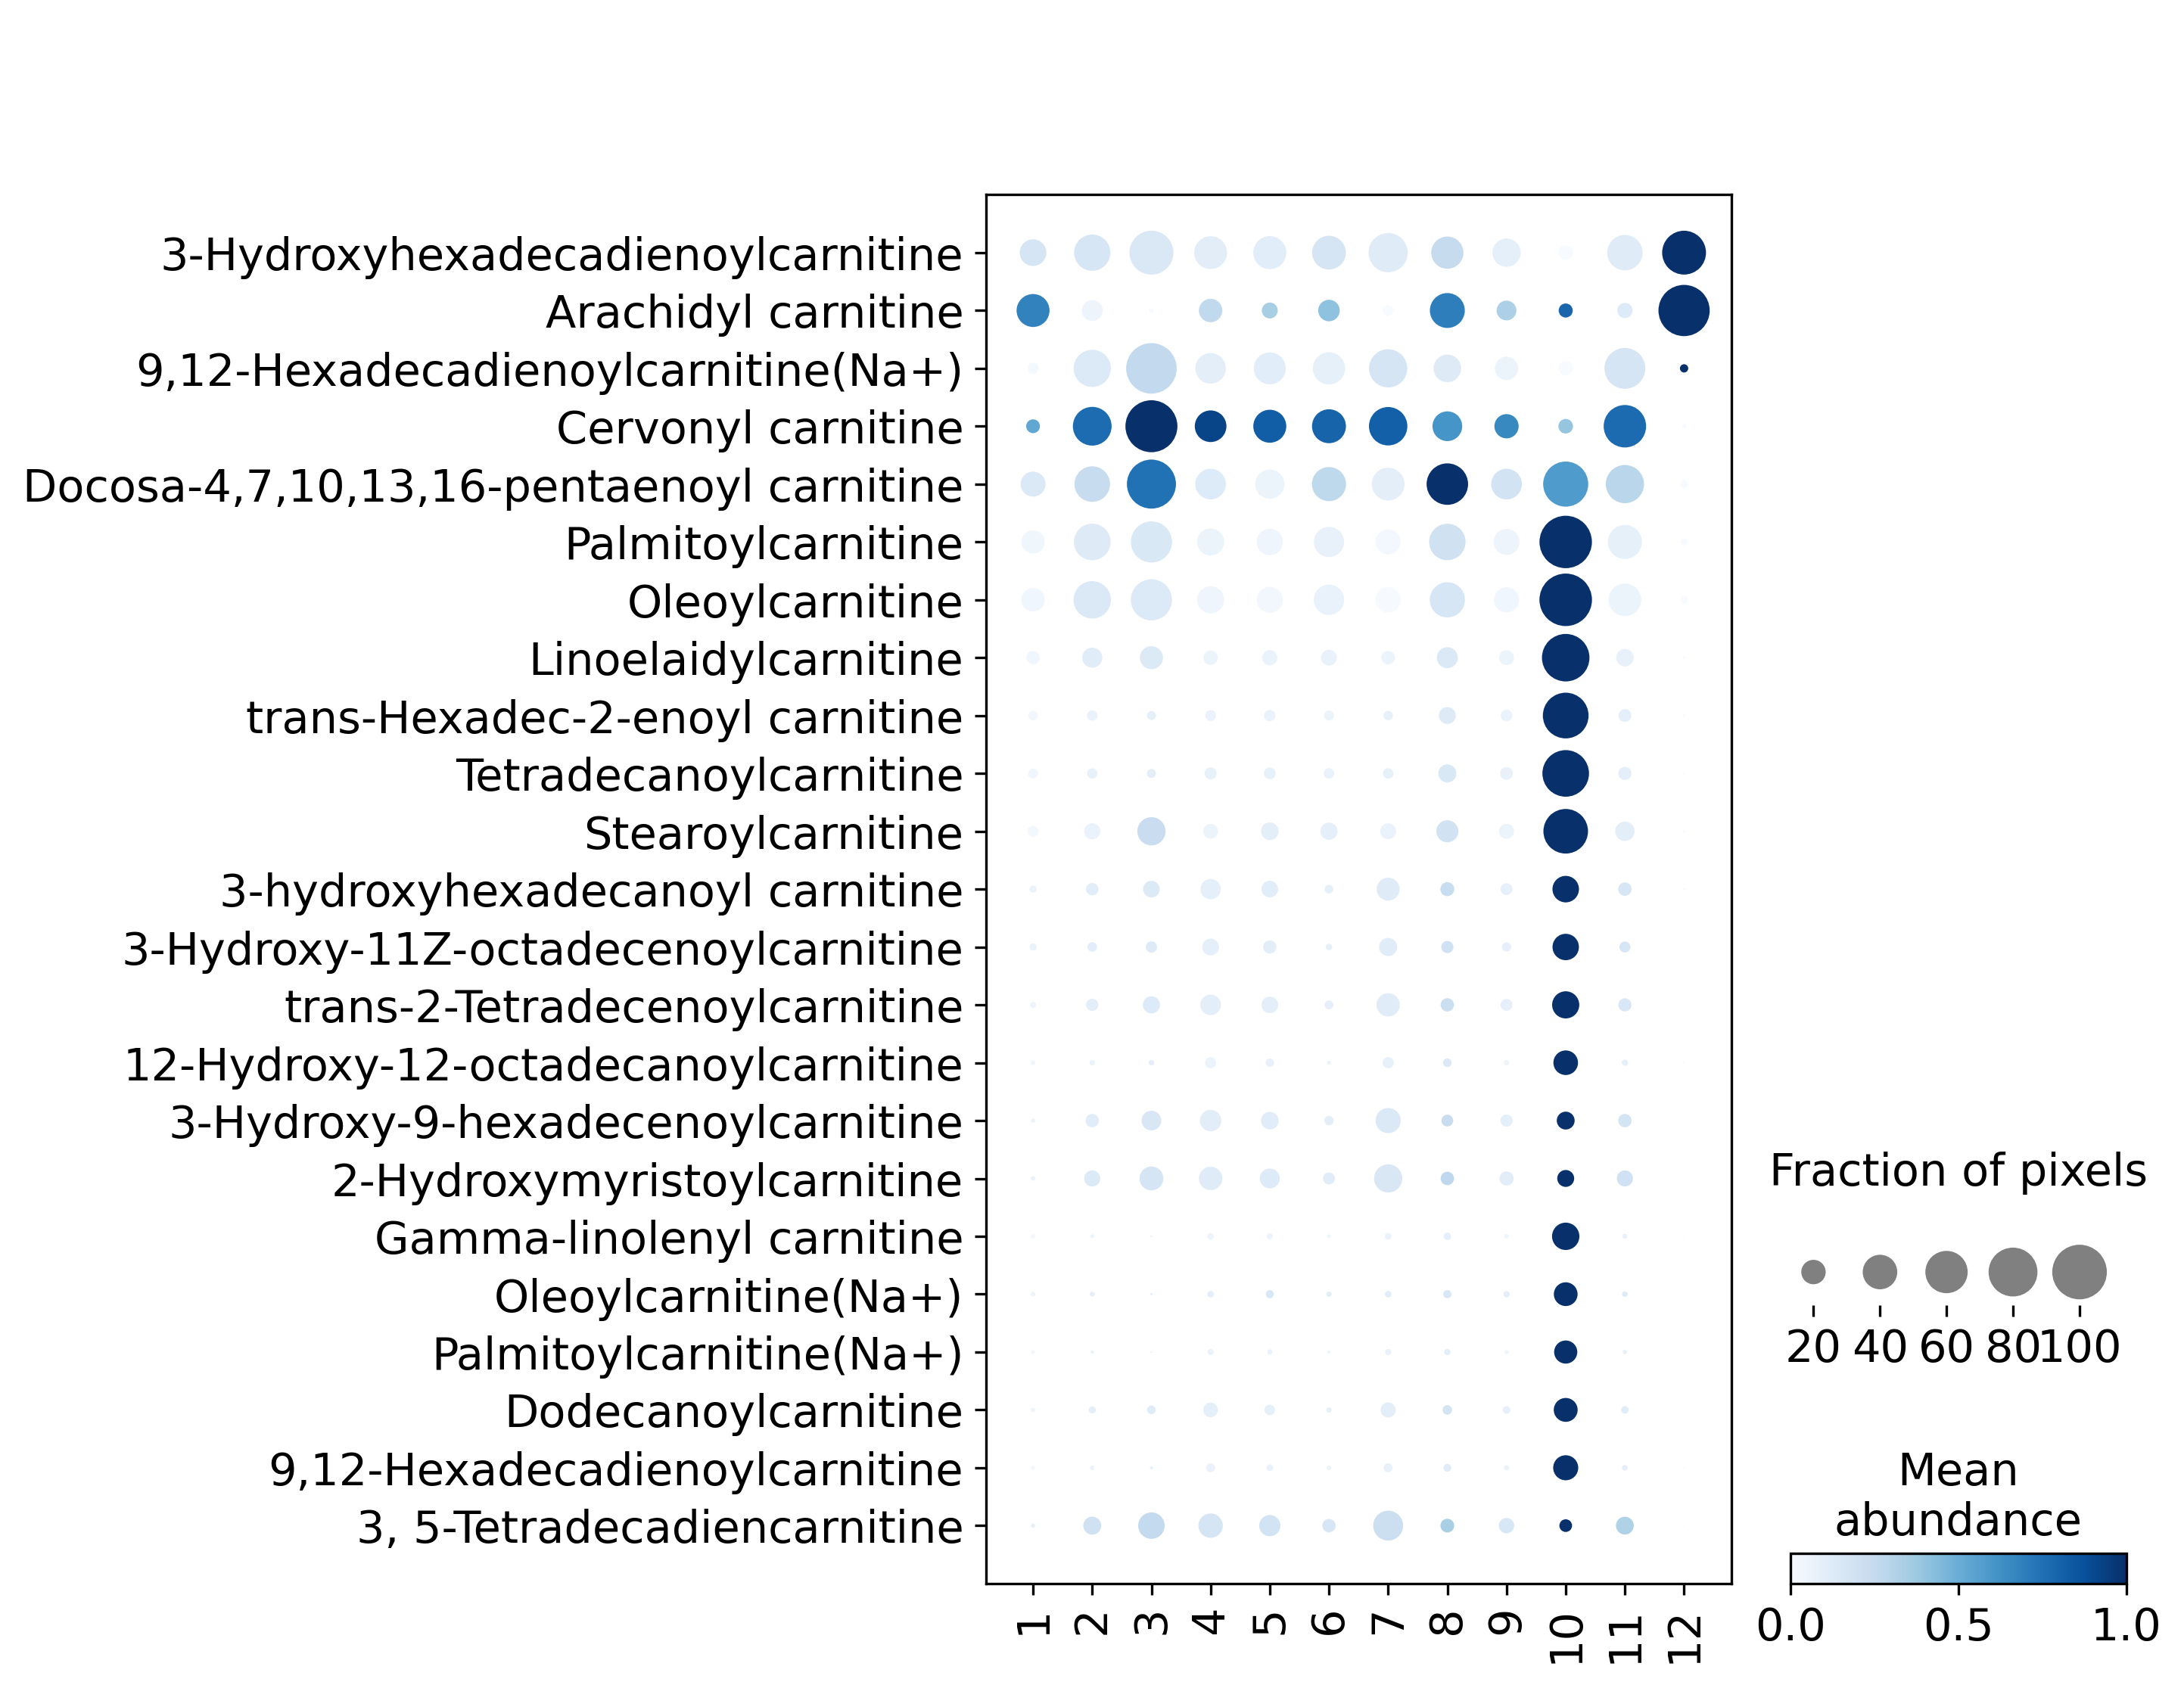

In [34]:
sc.settings.set_figure_params(dpi=300, facecolor='white',fontsize=17)
sc.pl.DotPlot(adata,carnitine_list_new, groupby='leiden_use',
             standard_scale='var')\
.style(cmap="Blues",largest_dot=300,dot_edge_lw=0,size_exponent=1)\
.legend(width=2,colorbar_title='Mean\nabundance',size_title='Fraction of pixels\n').swap_axes().show()

In [35]:
sc.tl.score_genes(adata, carnitine_list_new,
                  score_name='carnitine_score', ctrl_size=len(carnitine_list),n_bins=1000)

computing score 'carnitine_score'
/home/users/hli/anaconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:152: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
    finished: added
    'carnitine_score', score of gene set (adata.obs).
    1 total control genes are used. (0:00:05)


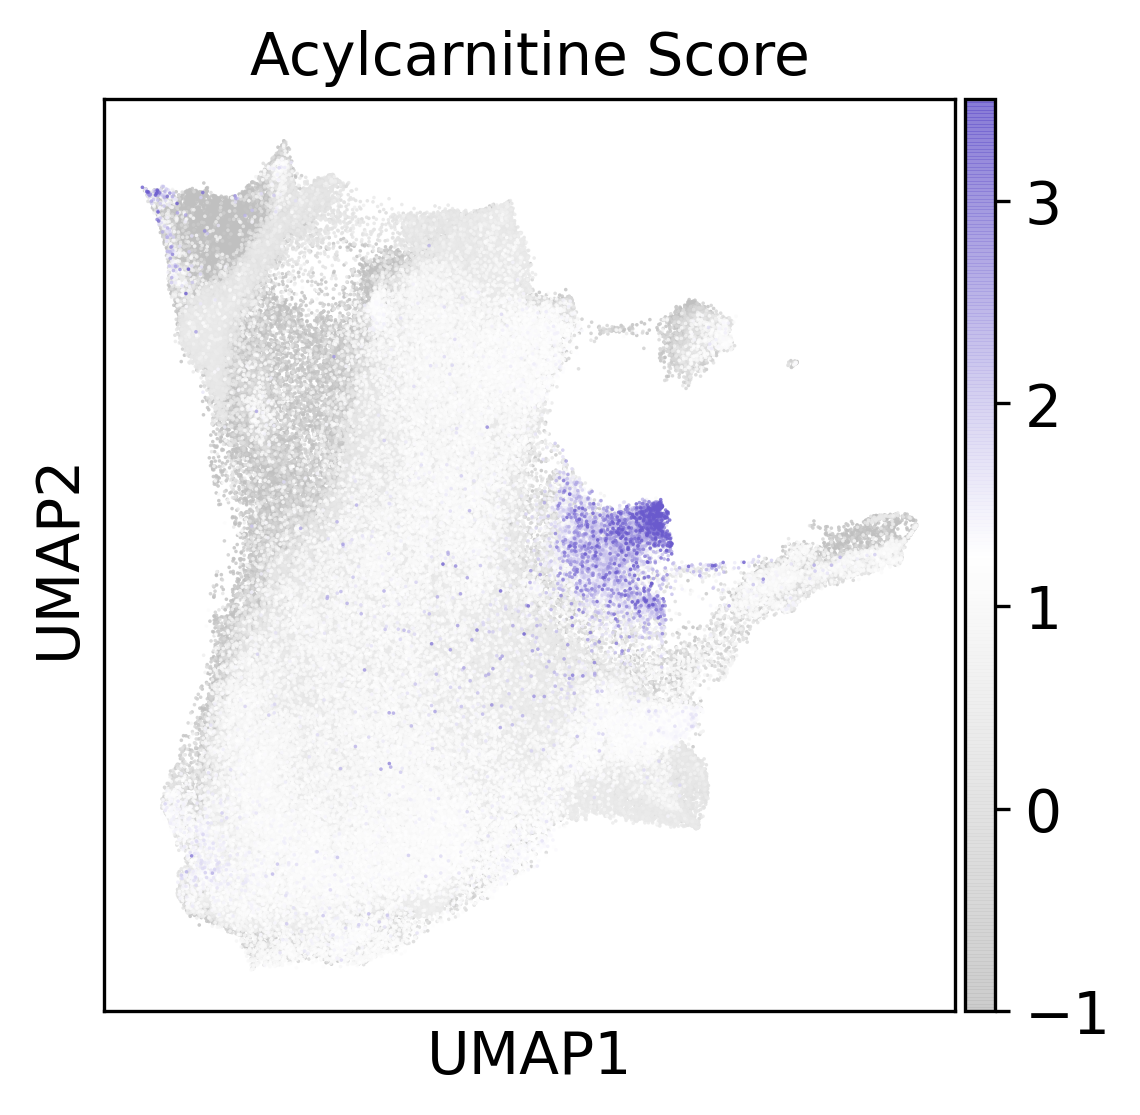

In [45]:
from matplotlib.colors import LinearSegmentedColormap
traffic=LinearSegmentedColormap.from_list('name',["silver", "w", "slateblue"], N=256)

sc.settings.set_figure_params(dpi=300, facecolor='white',fontsize=14)
sc.pl.umap(adata, color=['carnitine_score'], title='Acylcarnitine Score',vmin=-1, vmax=3.5, size=3, alpha=0.8, cmap=traffic)

In [26]:
cell_order=['1','2','3','4','5','6','7','8','9','10','11','12']

sample_name=['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla', 'Donor2_cortex', 'Donor2_medulla1', 'Donor2_medulla2']

dict2=pd.value_counts(adata.obs['sample_id_new'])

output=open('IMS_leiden_use_ratio_in_6samples.csv','w')
output.write('sample,')
for i in cell_order:
    if i == '12':
        output.write(str(i)+'%')
    else:
        output.write(str(i)+'%,')
output.write('\n')
for i in sample_name:
    sampletype=adata.obs[adata.obs['sample_id_new']==str(i)]
    celldict=pd.value_counts(sampletype['leiden_use'])
    output.write(str(i)+',')
    totaln=int(dict2[i])
    for aaa in cell_order:
        if aaa == '12':
            output.write(str(float(celldict[aaa])/totaln))
        else:
            output.write(str(float(celldict[aaa])/totaln)+',')
    output.write('\n')
file=pd.read_csv('IMS_leiden_use_ratio_in_6samples.csv', delimiter = ',',index_col=False)

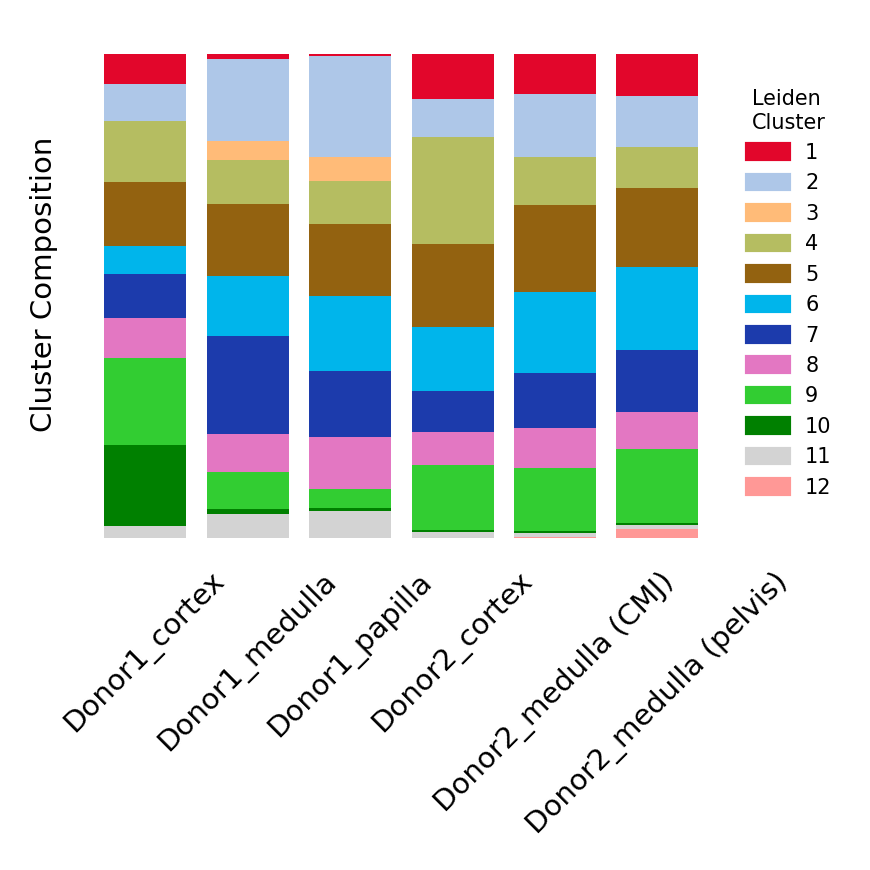

In [32]:
dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,6)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata.uns['leiden_use_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(3,3))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla', 'Donor2_cortex', 'Donor2_medulla (CMJ)', 'Donor2_medulla (pelvis)'], dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=45,fontsize=7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Cluster Composition',fontsize=7)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, labels,
           bbox_to_anchor=(1, 0.92),fontsize=5,frameon=False,title='Leiden\nCluster',title_fontsize=5)

plt.tight_layout()
#plt.savefig('figures/cell_ratio_dynamic_new_sample_corrected.png')
plt.show()

In [8]:
cell_order=['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla', 'Donor2_cortex', 'Donor2_medulla1', 'Donor2_medulla2']

sample_name=['1','2','3','4','5','6','7','8','9','10','11','12']

dict2=pd.value_counts(adata.obs['leiden_use'])

output=open('IMS_6samples_in_leiden_use.csv','w')
output.write('sample,')
for i in cell_order:
    if i == 'Donor2_medulla2':
        output.write(str(i)+'%')
    else:
        output.write(str(i)+'%,')
output.write('\n')
for i in sample_name:
    sampletype=adata.obs[adata.obs['leiden_use']==str(i)]
    celldict=pd.value_counts(sampletype['sample_id_new'])
    output.write(str(i)+',')
    totaln=int(dict2[i])
    for aaa in cell_order:
        if aaa == 'Donor2_medulla2':
            output.write(str(float(celldict[aaa])/totaln))
        else:
            output.write(str(float(celldict[aaa])/totaln)+',')
    output.write('\n')
file=pd.read_csv('IMS_6samples_in_leiden_use.csv', delimiter = ',',index_col=False)

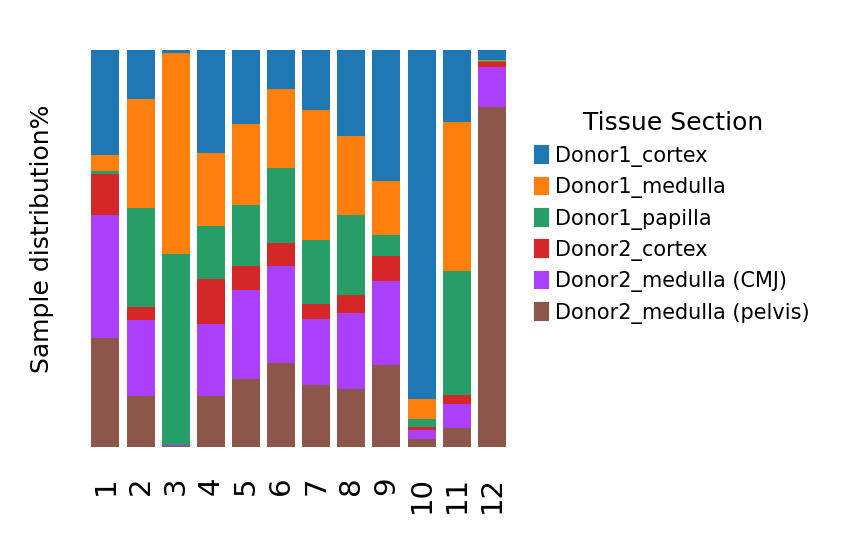

In [8]:
file=pd.read_csv('IMS_6samples_in_leiden_use.csv', delimiter = ',',index_col=False)
cell_order=['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla', 'Donor2_cortex', 'Donor2_medulla1', 'Donor2_medulla2']
sample_name=['1','2','3','4','5','6','7','8','9','10','11','12']

dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,12)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata.uns['sample_id_new_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(3,2))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(sample_name, dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=90,fontsize=7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Sample distribution%',fontsize=6)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, ['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla', 'Donor2_cortex', 'Donor2_medulla (CMJ)', 'Donor2_medulla (pelvis)'],
           bbox_to_anchor=(0.98, 0.85),fontsize=5,frameon=False,title='Tissue Section',title_fontsize=6)

plt.tight_layout()
#plt.savefig('figures/cell_ratio_dynamic_new_sample_corrected.png')
plt.show()

In [10]:
#Donor1
adata1=adata[adata.obs['patient_id_new'] == 'Donor1', :]

In [12]:
cell_order=['1','2','3','4','5','6','7','8','9','10','11','12']

sample_name=['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla']

dict2=pd.value_counts(adata1.obs['sample_id_new'])

output=open('IMS_leiden_use_ratio_in_6samples_donor1.csv','w')
output.write('sample,')
for i in cell_order:
    if i == '12':
        output.write(str(i)+'%')
    else:
        output.write(str(i)+'%,')
output.write('\n')
for i in sample_name:
    sampletype=adata1.obs[adata1.obs['sample_id_new']==str(i)]
    celldict=pd.value_counts(sampletype['leiden_use'])
    output.write(str(i)+',')
    totaln=int(dict2[i])
    for aaa in cell_order:
        if aaa == '12':
            output.write(str(float(celldict[aaa])/totaln))
        else:
            output.write(str(float(celldict[aaa])/totaln)+',')
    output.write('\n')
file=pd.read_csv('IMS_leiden_use_ratio_in_6samples_donor1.csv', delimiter = ',',index_col=False)

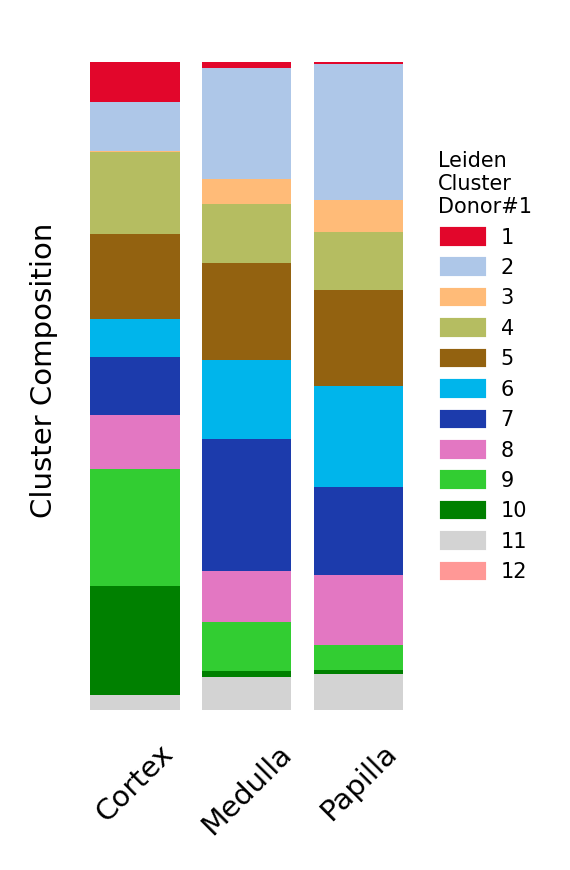

In [13]:
dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,3)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata1.uns['leiden_use_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(2,3))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(['Cortex','Medulla','Papilla'], dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=45,fontsize=7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Cluster Composition',fontsize=7)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1, 0.85),fontsize=5,frameon=False,title='Leiden\nCluster\nDonor#1',title_fontsize=5)

plt.tight_layout()
#plt.savefig('figures/cell_ratio_dynamic_new_sample_corrected.png')
plt.show()

In [15]:
cell_order=['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla']

sample_name=['1','2','3','4','5','6','7','8','9','10','11','12']

dict2=pd.value_counts(adata1.obs['leiden_use'])

output=open('IMS_6samples_in_leiden_use_donor1.csv','w')
output.write('sample,')
for i in cell_order:
    if i == 'Donor1_papilla':
        output.write(str(i)+'%')
    else:
        output.write(str(i)+'%,')
output.write('\n')
for i in sample_name:
    sampletype=adata1.obs[adata1.obs['leiden_use']==str(i)]
    celldict=pd.value_counts(sampletype['sample_id_new'])
    output.write(str(i)+',')
    totaln=int(dict2[i])
    for aaa in cell_order:
        if aaa == 'Donor1_papilla':
            output.write(str(float(celldict[aaa])/totaln))
        else:
            output.write(str(float(celldict[aaa])/totaln)+',')
    output.write('\n')
file=pd.read_csv('IMS_6samples_in_leiden_use_donor1.csv', delimiter = ',',index_col=False)
file

,sample,Donor1_cortex%,Donor1_medulla%,Donor1_papilla%
0,1,0.848914,0.123672,0.027414
1,2,0.192559,0.421754,0.385687
2,3,0.007008,0.508836,0.484156
3,4,0.451476,0.318397,0.230128
4,5,0.342510,0.377374,0.280116
5,6,0.200292,0.410975,0.388733
6,7,0.234771,0.511148,0.254081
7,8,0.348975,0.322832,0.328193
8,9,0.637061,0.262125,0.100814
9,10,0.925896,0.052298,0.021806


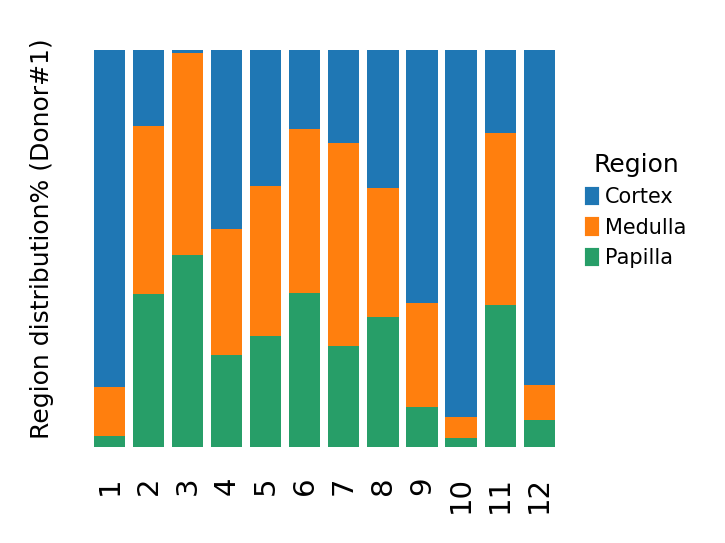

In [16]:
file=pd.read_csv('IMS_6samples_in_leiden_use_donor1.csv', delimiter = ',',index_col=False)
cell_order=['Donor1_cortex', 'Donor1_medulla', 'Donor1_papilla']
sample_name=['1','2','3','4','5','6','7','8','9','10','11','12']

dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,12)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata1.uns['sample_id_new_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(2.6,2))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(sample_name, dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=90,fontsize=7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Region distribution% (Donor#1)',fontsize=6)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, ['Cortex','Medulla','Papilla'], bbox_to_anchor=(0.98, 0.75),fontsize=5,frameon=False,title='Region',title_fontsize=6)

plt.tight_layout()
#plt.savefig('figures/cell_ratio_dynamic_new_sample_corrected.png')
plt.show()

In [12]:
#Donor2
adata2=adata[adata.obs['patient_id_new'] == 'Donor2', :]

In [19]:
cell_order=['1','2','3','4','5','6','7','8','9','10','11','12']

sample_name=['Donor2_cortex', 'Donor2_medulla1', 'Donor2_medulla2']

dict2=pd.value_counts(adata2.obs['sample_id_new'])

output=open('IMS_leiden_use_ratio_in_6samples_donor2.csv','w')
output.write('sample,')
for i in cell_order:
    if i == '12':
        output.write(str(i)+'%')
    else:
        output.write(str(i)+'%,')
output.write('\n')
for i in sample_name:
    sampletype=adata2.obs[adata2.obs['sample_id_new']==str(i)]
    celldict=pd.value_counts(sampletype['leiden_use'])
    output.write(str(i)+',')
    totaln=int(dict2[i])
    for aaa in cell_order:
        if aaa == '12':
            output.write(str(float(celldict[aaa])/totaln))
        else:
            output.write(str(float(celldict[aaa])/totaln)+',')
    output.write('\n')
file=pd.read_csv('IMS_leiden_use_ratio_in_6samples_donor2.csv', delimiter = ',',index_col=False)

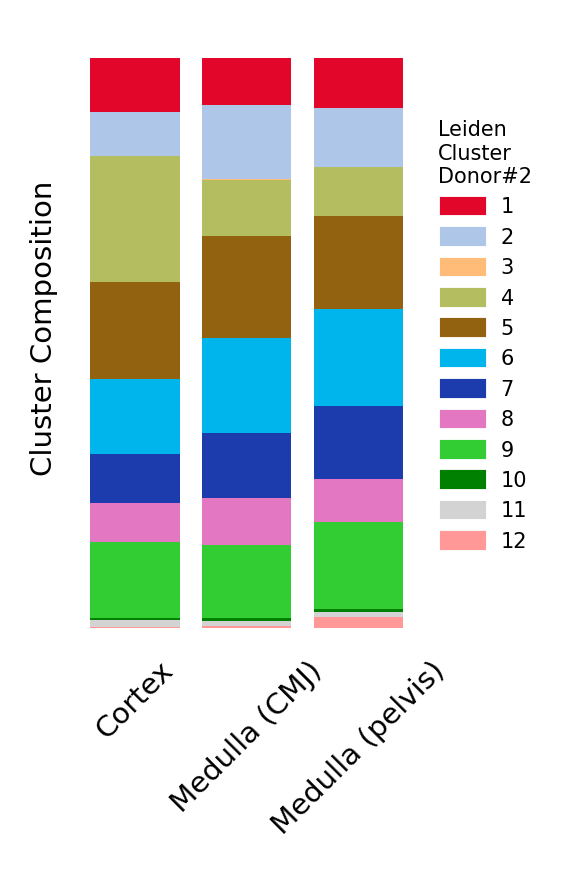

In [20]:
dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,3)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata2.uns['leiden_use_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(2,3))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(['Cortex','Medulla (CMJ)','Medulla (pelvis)'], dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=45,fontsize=7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Cluster Composition',fontsize=7)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1, 0.88),fontsize=5,frameon=False,title='Leiden\nCluster\nDonor#2',title_fontsize=5)

plt.tight_layout()
plt.show()

In [22]:
cell_order=['Donor2_cortex', 'Donor2_medulla1', 'Donor2_medulla2']

sample_name=['1','2','3','4','5','6','7','8','9','10','11','12']

dict2=pd.value_counts(adata2.obs['leiden_use'])

output=open('IMS_6samples_in_leiden_use_donor2.csv','w')
output.write('sample,')
for i in cell_order:
    if i == 'Donor2_medulla2':
        output.write(str(i)+'%')
    else:
        output.write(str(i)+'%,')
output.write('\n')
for i in sample_name:
    sampletype=adata2.obs[adata2.obs['leiden_use']==str(i)]
    celldict=pd.value_counts(sampletype['sample_id_new'])
    output.write(str(i)+',')
    totaln=int(dict2[i])
    for aaa in cell_order:
        if aaa == 'Donor2_medulla2':
            output.write(str(float(celldict[aaa])/totaln))
        else:
            output.write(str(float(celldict[aaa])/totaln)+',')
    output.write('\n')
file=pd.read_csv('IMS_6samples_in_leiden_use_donor2.csv', delimiter = ',',index_col=False)

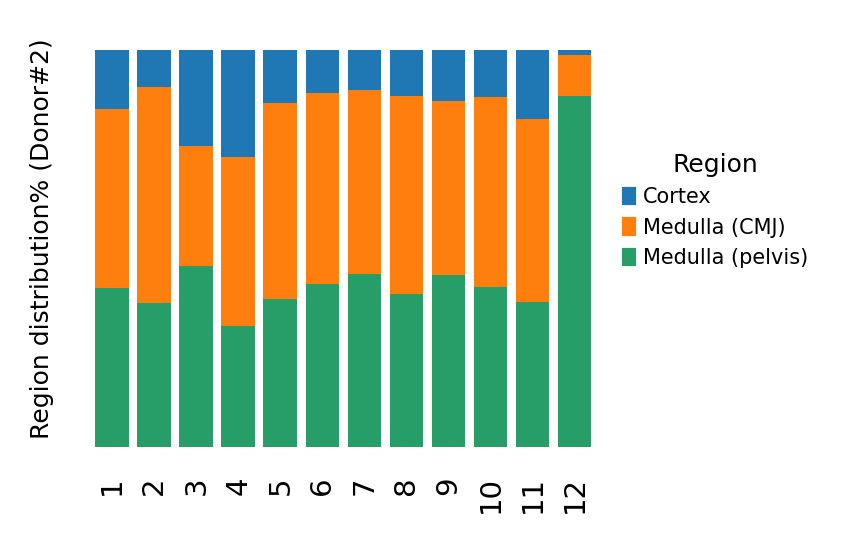

In [13]:
file=pd.read_csv('IMS_6samples_in_leiden_use_donor2.csv', delimiter = ',',index_col=False)
cell_order=['Donor2_cortex', 'Donor2_medulla1', 'Donor2_medulla2']
sample_name=['1','2','3','4','5','6','7','8','9','10','11','12']

dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,12)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata1.uns['sample_id_new_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(3,2))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(sample_name, dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=90,fontsize=7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Region distribution% (Donor#2)',fontsize=6)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, ['Cortex','Medulla (CMJ)','Medulla (pelvis)'], bbox_to_anchor=(0.98, 0.75),fontsize=5,frameon=False,title='Region',title_fontsize=6)

plt.tight_layout()
#plt.savefig('figures/cell_ratio_dynamic_new_sample_corrected.png')
plt.show()

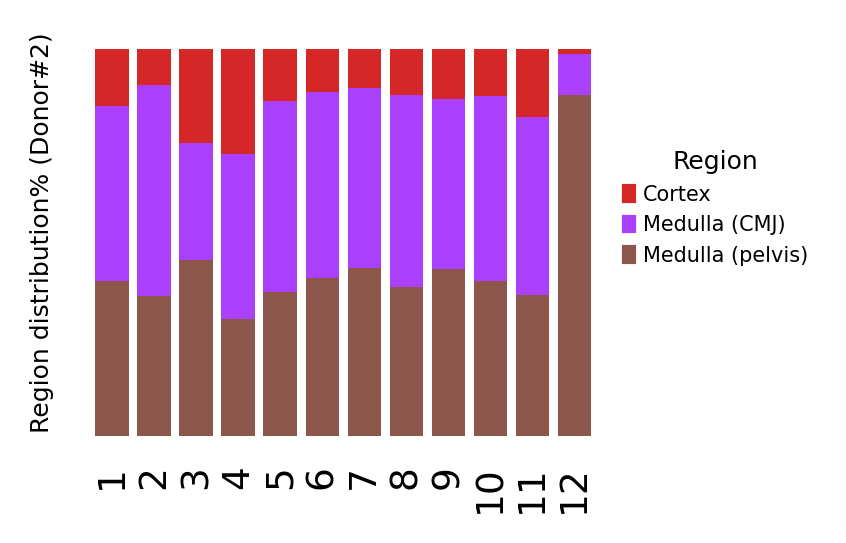

In [15]:
dict1={}
for i in range(len(cell_order)):
    dict1[cell_order[i]]=np.array(file.iloc[:,[i+1]].iloc[:,0])
dynamics=np.repeat(1,12)

dict2={}
for i in dict1.keys():
    dynamics=dynamics-dict1[i]
    dict2[i]=dynamics
color_dict={}
for i in cell_order:
    ind=cell_order.index(i)
    color_dict[i]=adata2.uns['sample_id_new_colors'][ind]

import matplotlib.pyplot as plt 
plt.figure(dpi = 300, figsize=(3,2))
width =0.8
for i in range(len(cell_order)):
    celltype=cell_order[i]
    plt.bar(sample_name, dict1[celltype], width, bottom=dict2[celltype], color=color_dict[celltype])


plt.grid(False)
plt.xticks(rotation=90,fontsize=9)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,         # ticks along the top edge are off
labelleft=False)
plt.ylabel('Region distribution% (Donor#2)',fontsize=6)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
labels = list(color_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]
plt.legend(handles, ['Cortex','Medulla (CMJ)','Medulla (pelvis)'], bbox_to_anchor=(0.98, 0.75),fontsize=5,frameon=False,title='Region',title_fontsize=6)

plt.tight_layout()
#plt.savefig('figures/cell_ratio_dynamic_new_sample_corrected.png')
plt.show()